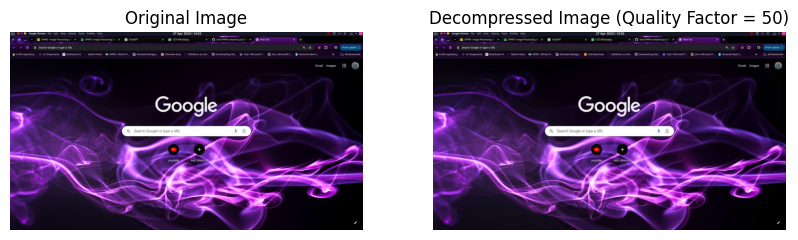

PSNR between Original and Decompressed Image: 36.91123785937522


In [10]:
import cv2
import numpy as np

def compress_image(image, quality_factor):
    # Convert image to JPEG format with specified quality factor
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality_factor]
    _, compressed_data = cv2.imencode('.jpg', image, encode_param)
    # Decode the compressed data
    decompressed_image = cv2.imdecode(compressed_data, 1)
    return decompressed_image

def calculate_psnr(original_image, decompressed_image):
    mse = np.mean((original_image - decompressed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the image
original_image = cv2.imread('imagepng.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Define the compression quality factor
quality_factor = 50  # Adjust this value as needed

# Compress the image
compressed_image = compress_image(original_image, quality_factor)

# Calculate PSNR
psnr = calculate_psnr(original_image, compressed_image)

# Display the original and decompressed images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title('Decompressed Image (Quality Factor = {})'.format(quality_factor))
plt.axis('off')

plt.show()

print("PSNR between Original and Decompressed Image:", psnr)